   customer_id           channel       cost  conversion_rate  revenue
0            1          referral   8.320327         0.123145     4199
1            2  paid advertising  30.450327         0.016341     3410
2            3   email marketing   5.246263         0.043822     3164
3            4      social media   9.546326         0.167592     1520
4            5          referral   8.320327         0.123145     2419


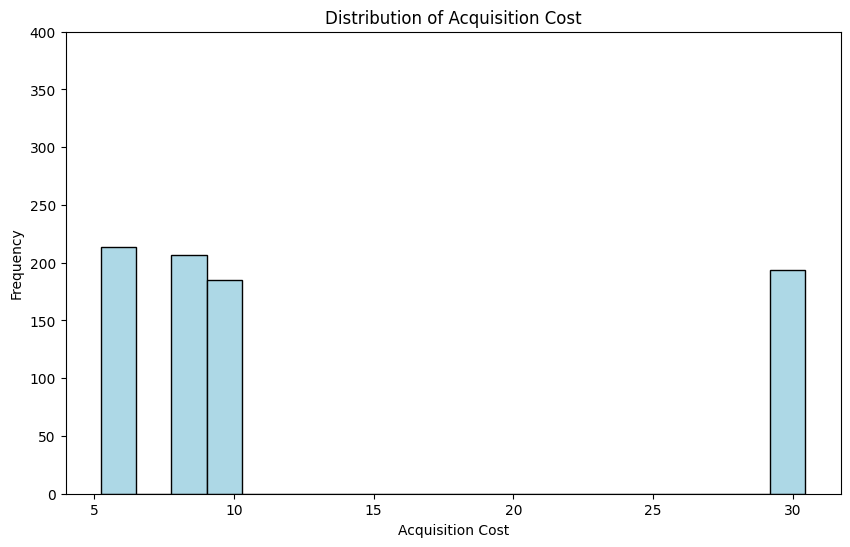

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("customer_acquisition_data.csv")
print(data.head())

fig = plt.figure(figsize=(10, 6))
plt.hist(data['cost'], bins=20, edgecolor='black',facecolor='lightblue')
plt.title('Distribution of Acquisition Cost')
plt.xlabel('Acquisition Cost')
plt.ylabel('Frequency')
plt.ylim(0, 400)
plt.show()

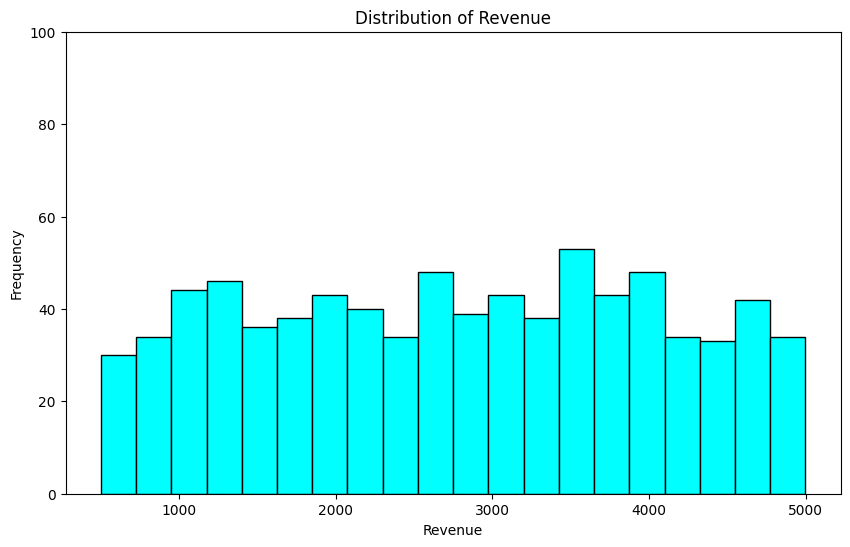

In [2]:
fig = plt.figure(figsize=(10, 6))
plt.hist(data['revenue'], bins=20, edgecolor='black',facecolor='cyan')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.ylim(0, 100)
plt.show()

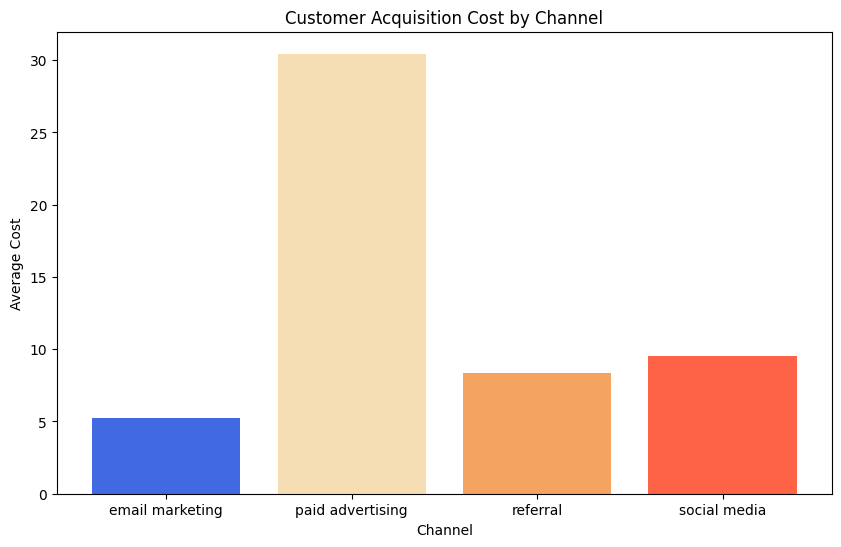

In [3]:
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()

fig = plt.figure(figsize=(10, 6))
plt.bar(cost_by_channel['channel'], cost_by_channel['cost'],color = ['royalblue','wheat','sandybrown','tomato'])
plt.title('Customer Acquisition Cost by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Cost')
plt.show()

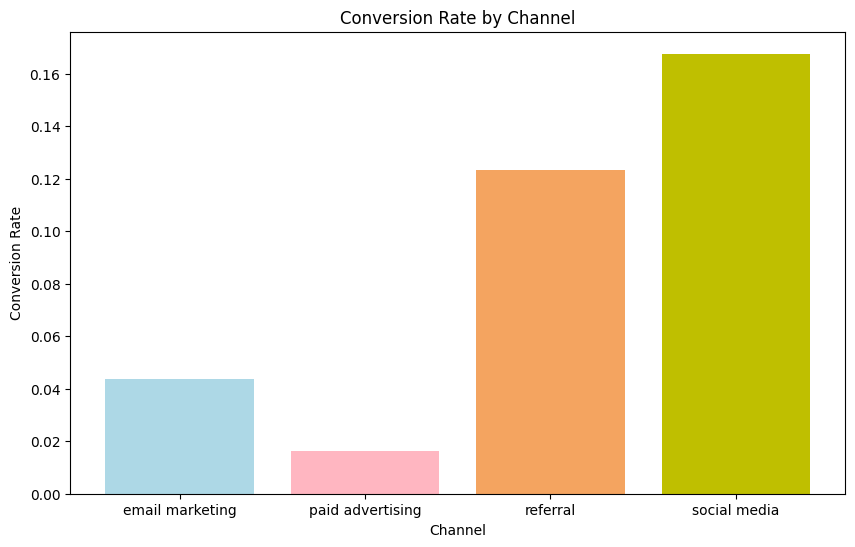

In [4]:
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()

fig = plt.figure(figsize=(10, 6))
plt.bar(conversion_by_channel['channel'], conversion_by_channel['conversion_rate'], color = ['lightblue','lightpink','sandybrown','y'])
plt.title('Conversion Rate by Channel')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.show()

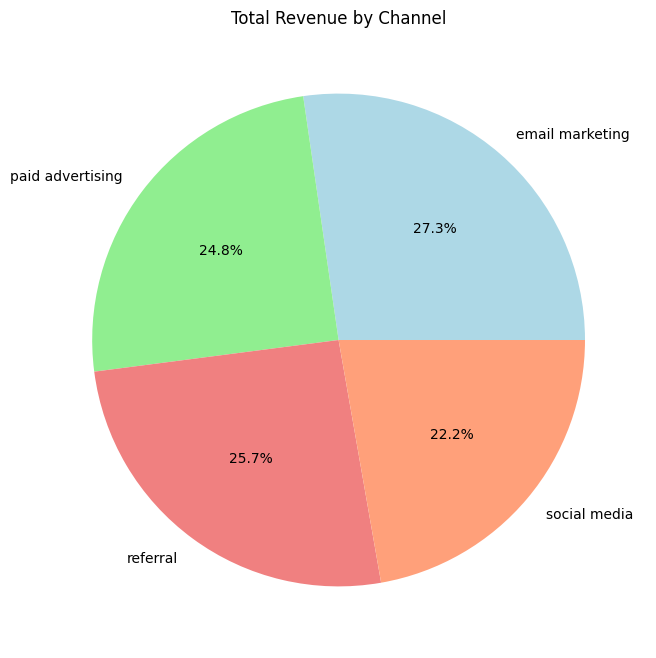

In [5]:
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()

fig = plt.figure(figsize=(8, 8))
plt.pie(revenue_by_channel['revenue'], labels=revenue_by_channel['channel'], autopct='%1.1f%%',
        colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])
plt.title('Total Revenue by Channel')
plt.show()

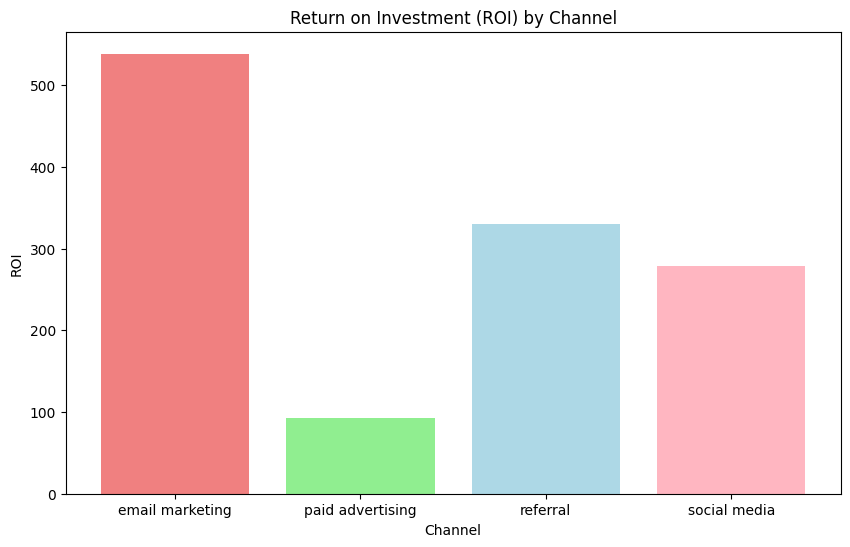

In [6]:
data['roi'] = data['revenue'] / data['cost']
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

fig = plt.figure(figsize=(10, 6))
plt.bar(roi_by_channel['channel'], roi_by_channel['roi'],color=[ 'lightcoral','lightgreen','lightblue' , 'lightpink'])
plt.title('Return on Investment (ROI) by Channel')
plt.xlabel('Channel')
plt.ylabel('ROI')
plt.show()

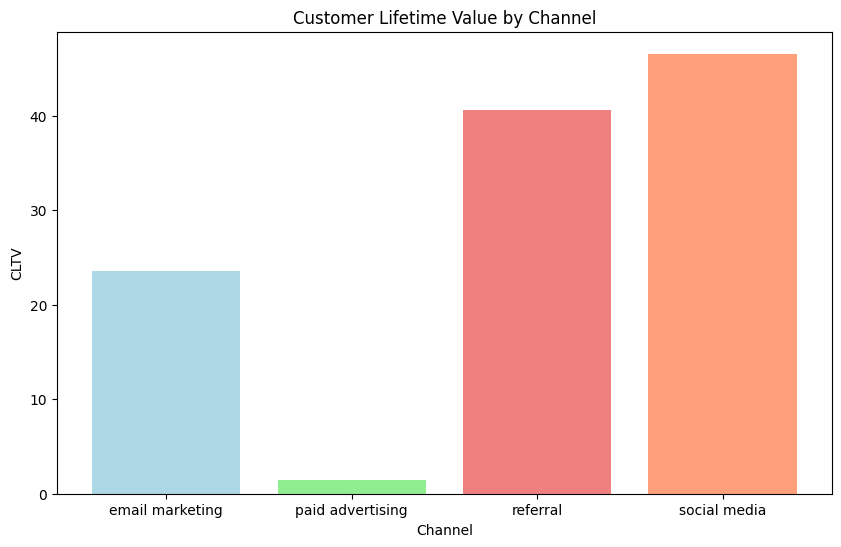

In [7]:
data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']

channel_cltv = data.groupby('channel')['cltv'].mean().reset_index()

fig = plt.figure(figsize=(10, 6))
plt.bar(channel_cltv['channel'], channel_cltv['cltv'], color=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink'])
plt.title('Customer Lifetime Value by Channel')
plt.xlabel('Channel')
plt.ylabel('CLTV')
plt.show()

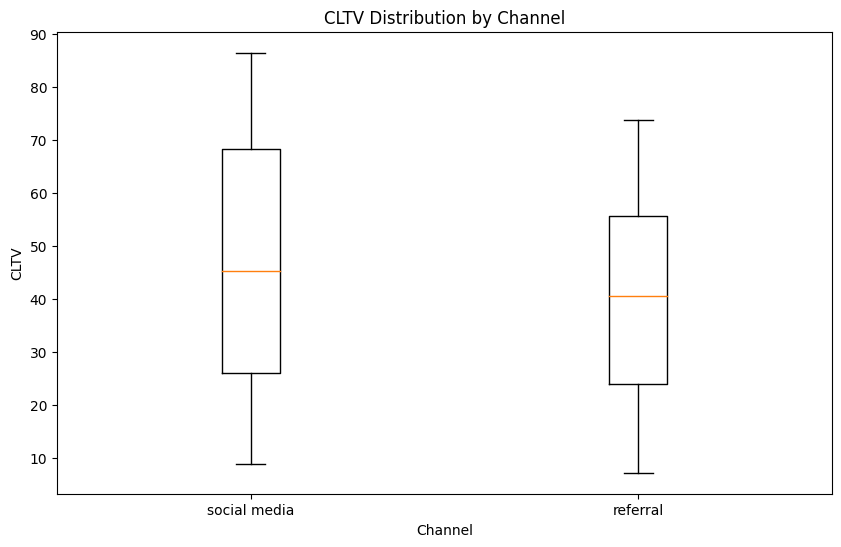

In [8]:
subset = data.loc[data['channel'].isin(['social media', 'referral'])]

fig = plt.figure(figsize=(10, 6))
plt.boxplot([subset[subset['channel'] == 'social media']['cltv'], subset[subset['channel'] == 'referral']['cltv']],
            labels=['social media', 'referral'])
plt.title('CLTV Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('CLTV')
plt.show()